In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

%matplotlib inline
random.seed(123) # Works same every time we run

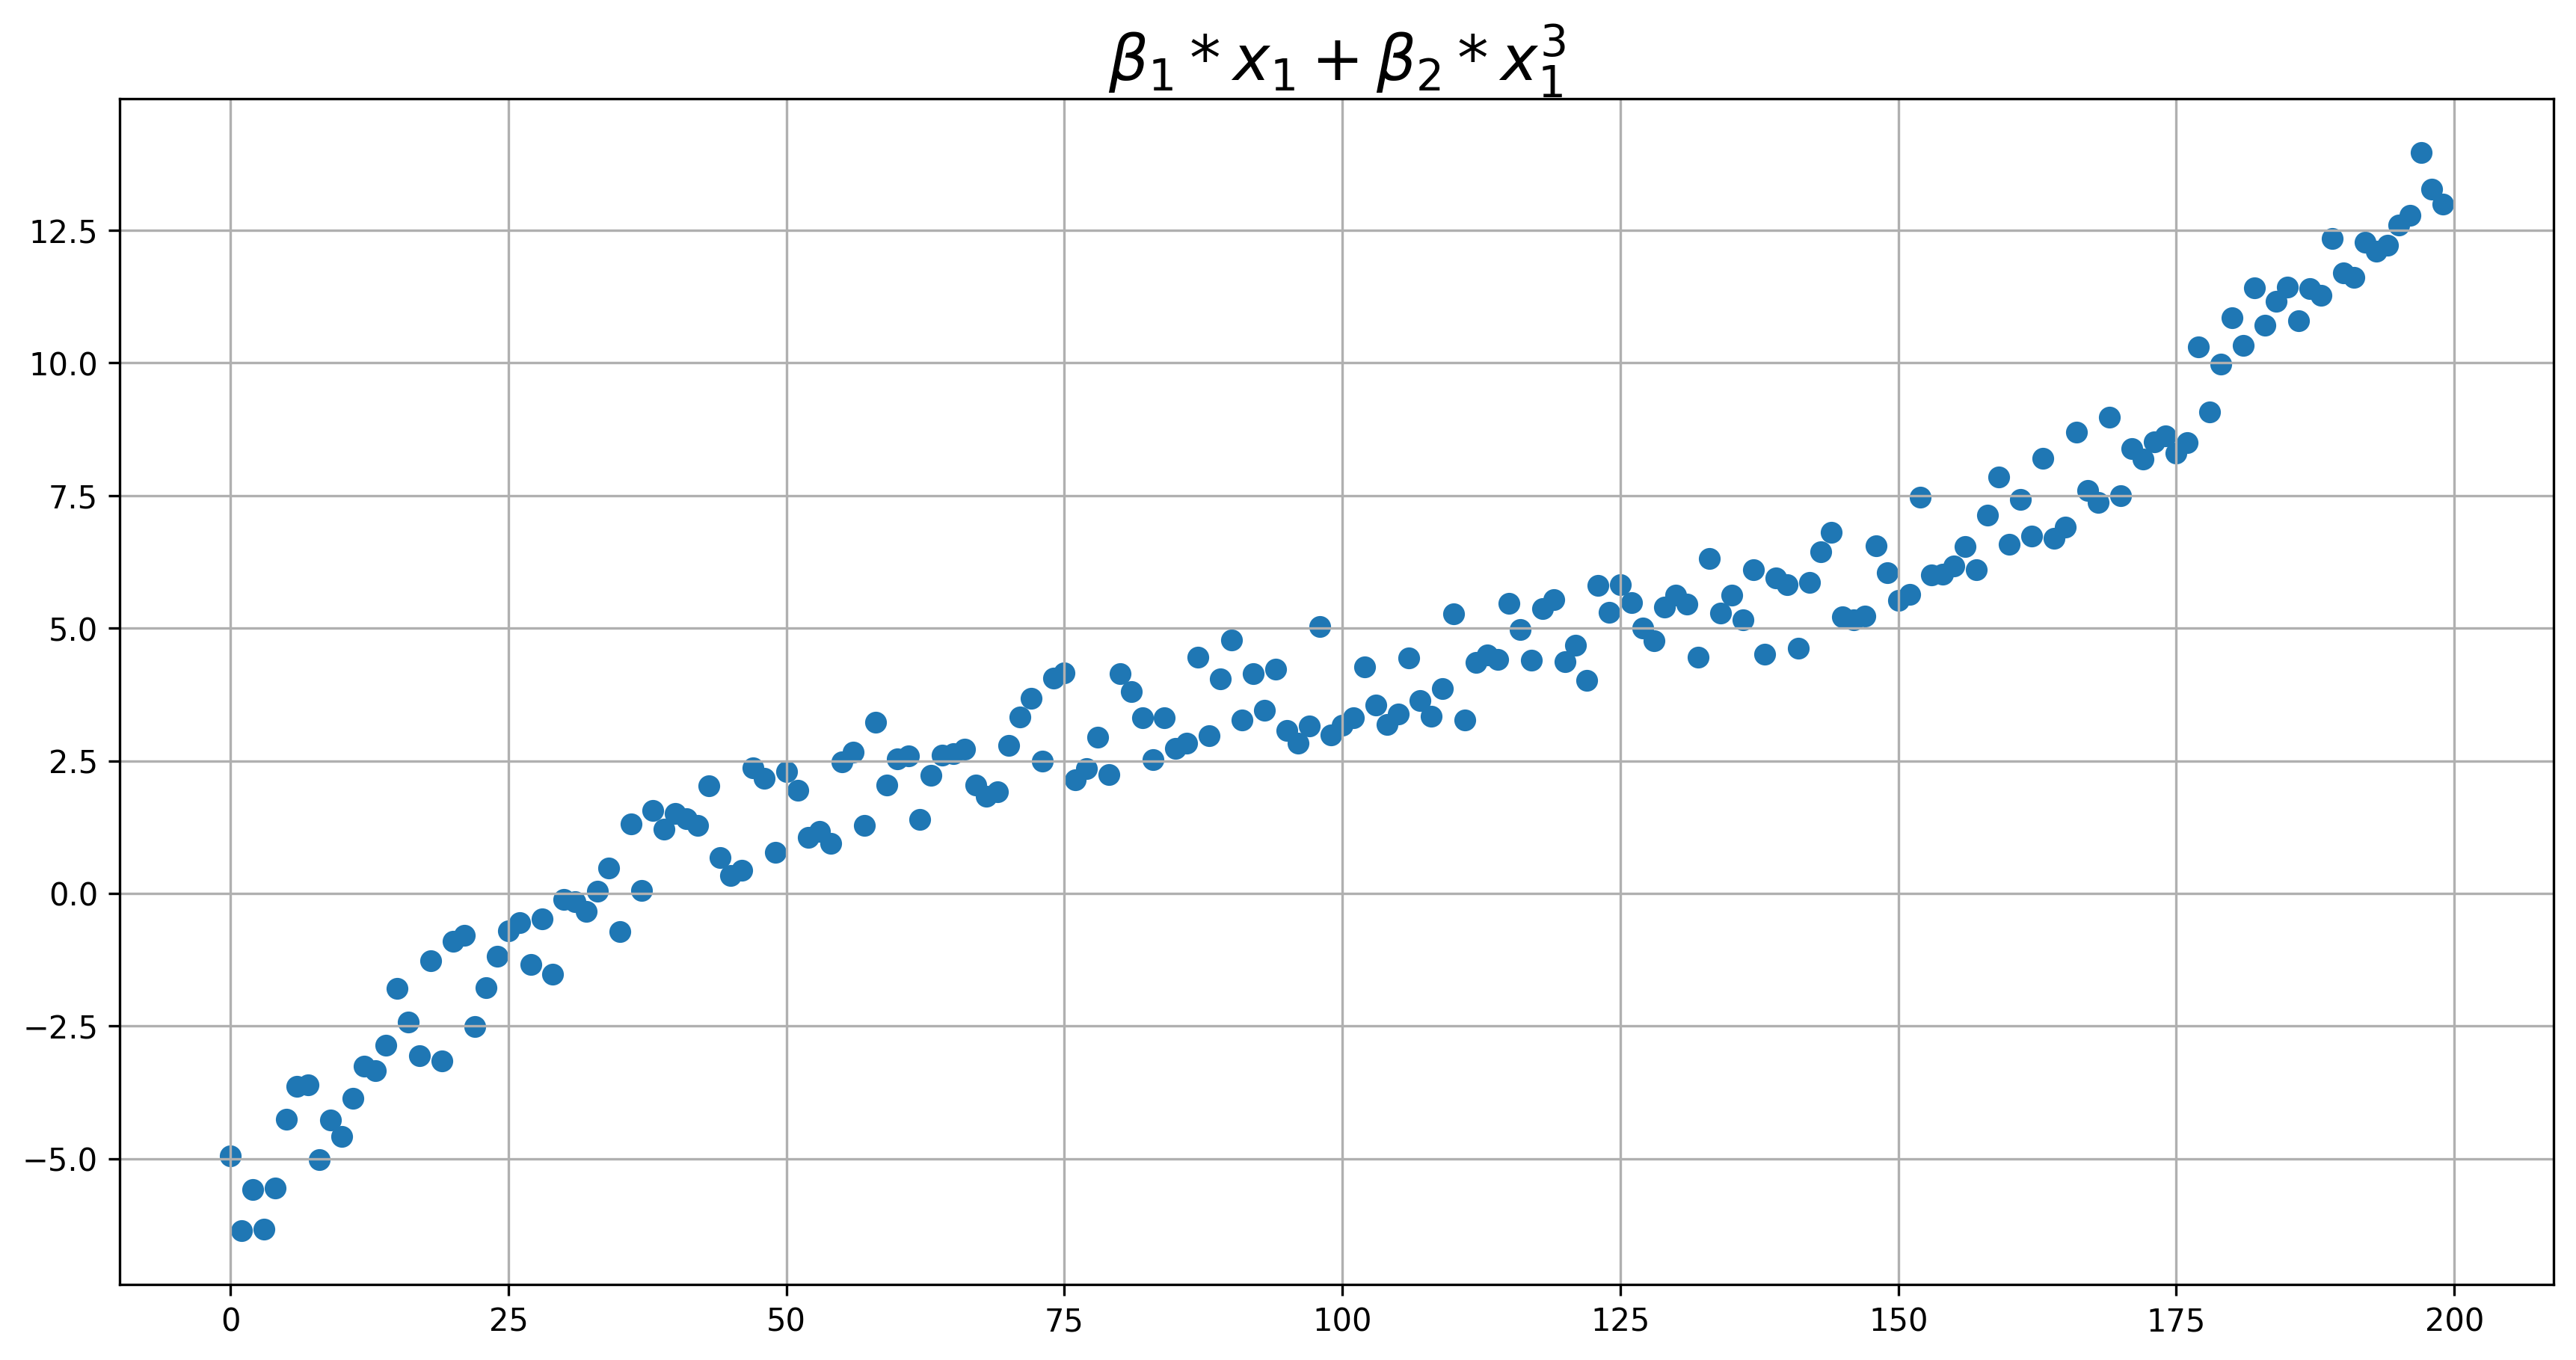

In [3]:
x = np.arange(-1,1,0.01) # Processor
randomness = np.random.uniform(-1.1,1.1,len(x))
beta_1 = 3
beta_2 = 7
intercept = 4
y = beta_1*x + beta_2*(x**3)+ intercept + randomness
fig = plt.figure(figsize = (14, 7),dpi=300)
 
plt.title(r"$\beta_1 * x_1 + \beta_2 * x_1^3$",fontsize=20)
plt.grid()
plt.scatter(range(0,len(y)), y)
plt.savefig("Polynomial_Regression.png", dpi=300)

Best possible beta 1 1.8138451294966667
Best possible beta 2 1.2210268710613292
Best possible intercept 3.746714000130117
Final Error is 8.13


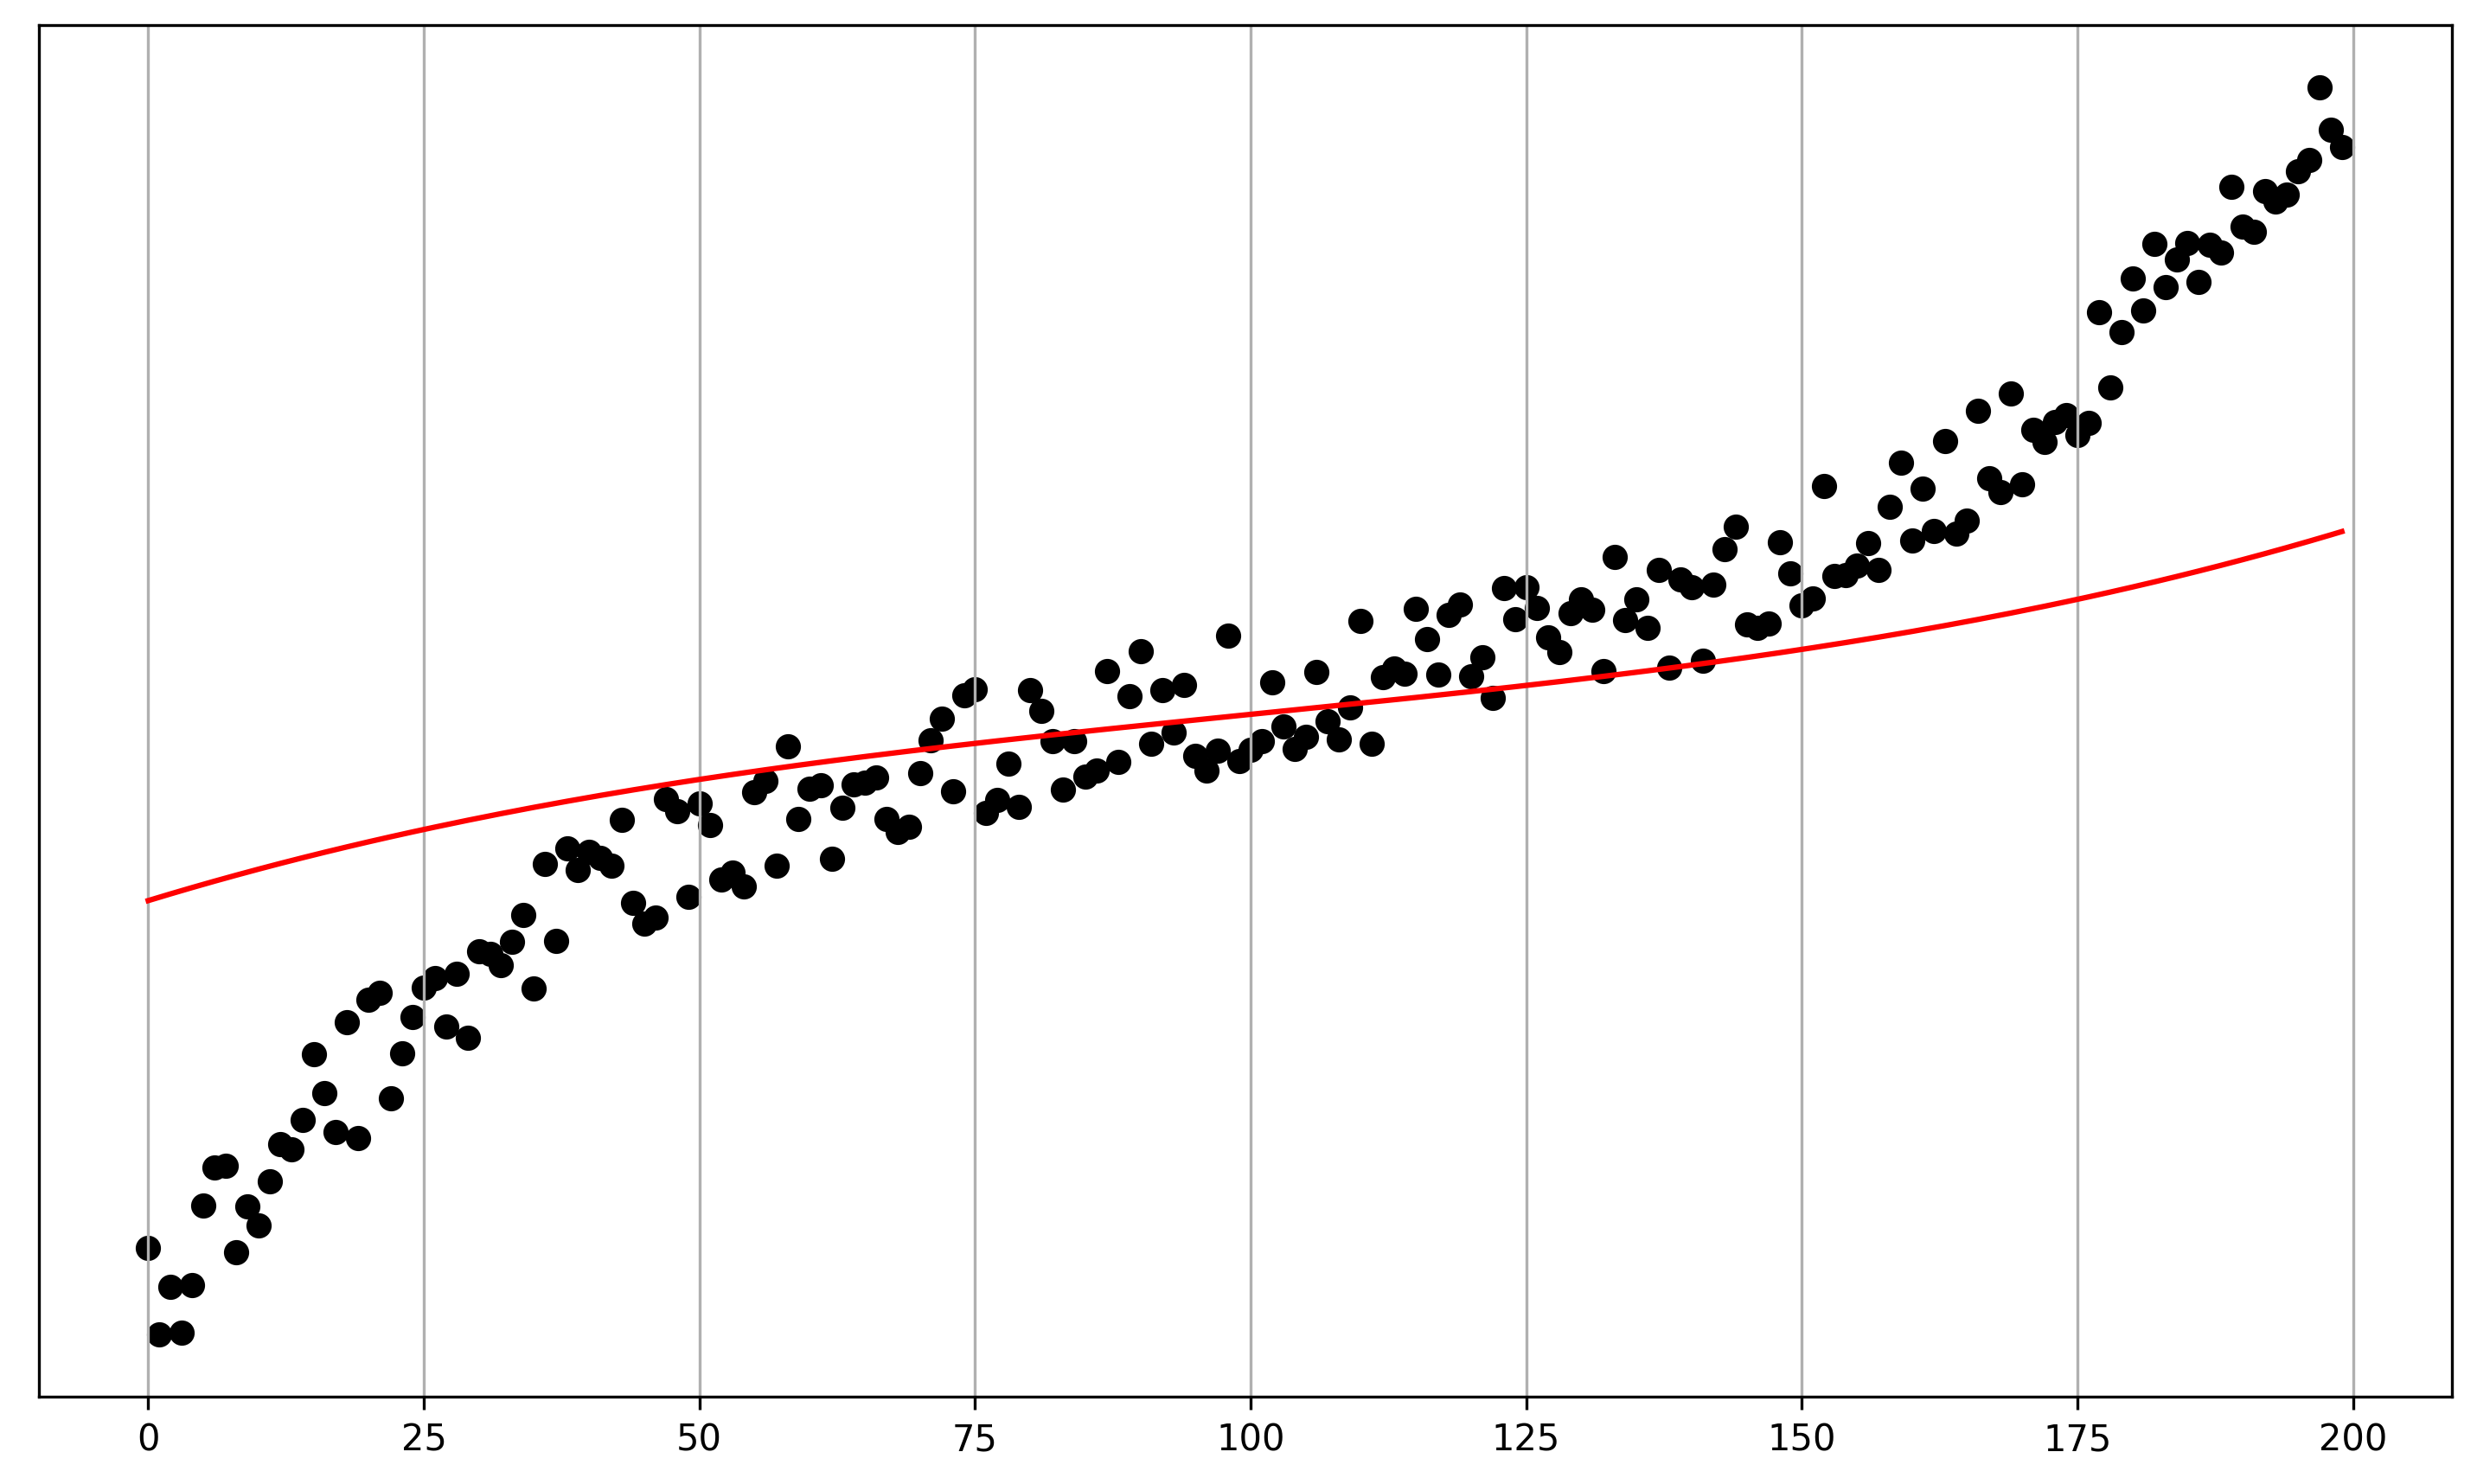

In [4]:
def mean_squared_error(y_true,y_pred):
    return ((y_true-y_pred)**2).sum()/len(y_true)

def optimizer(intercept,b_1,b_2,independent_1,dependent,learning_rate):  
    
    gradient_for_b_1=0
    gradient_for_b_2=0
    gradient_for_intercept=0
    
    number_of_points = len(dependent)
    
    for i in range(0,number_of_points):
        
        const = (dependent[i] - ((b_1*independent_1[i])+(b_2*(independent_1[i]**3))))
        
        gradient_for_b_1+= (const  * independent_1[i]) 
        gradient_for_b_2+= (const  * (independent_1[i]**3))
        gradient_for_intercept+= (const)
        
    # Normalize the gradients
    gradient_for_b_1 = (-2/number_of_points) * gradient_for_b_1
    gradient_for_b_2 = (-2/number_of_points) * gradient_for_b_2
    gradient_for_intercept = (-2/number_of_points) * gradient_for_intercept
            
    b_1             =       b_1 - (learning_rate * (gradient_for_b_1))
    
    b_2             =       b_2 - (learning_rate * (gradient_for_b_2))
    intercept       =       intercept - (learning_rate * (gradient_for_intercept))
    
                          
    return b_1,b_2,intercept

number_of_epochs=1200
learning_rate = 0.0004
b_1,b_2,intercept=0,0,0
errors = []
for e in range(0,number_of_epochs):
    b_1,b_2,intercept = optimizer(intercept,b_1,b_2,x,y,learning_rate)
    errors.append(mean_squared_error(y,intercept + (b_1*x)+b_2*(x**3)))
    
print(f"Best possible beta 1 {b_1}")
print(f"Best possible beta 2 {b_2}")
print(f"Best possible intercept {intercept}")
print(f"Final Error is {errors[-1]:.2f}")

y_draw = (b_1*x)+b_2*(x**3)+intercept
fig = plt.figure(1,(12,7), dpi=300)
plt.scatter(range(0,len(y)), y,color="black")
plt.plot(range(0,len(y)),y_draw,color="red")
plt.grid(True)
plt.yticks([])
plt.savefig("Polynomial_Save.png", dpi=300)